In [12]:
# Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load Dataset

df = pd.read_csv("cyber.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [14]:
# Create Binary Target Column  (1 = Cyberbullying, 0 = Normal)

df['target'] = (
    df['toxic'] |
    df['severe_toxic'] |
    df['obscene'] |
    df['threat'] |
    df['insult'] |
    df['identity_hate']
)

print(df['target'].value_counts())


target
0    143346
1     16225
Name: count, dtype: int64


In [15]:
# Feature & Target Selection

X_text = df['comment_text'].fillna('').astype(str)
y = df['target']

In [16]:
# Convert Text to Numerical (TF-IDF)
tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=10000,
    ngram_range=(1,2)
)

X = tfidf.fit_transform(X_text)

In [17]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [18]:
# Model

nb = MultinomialNB()
nb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [19]:
# Prediction
y_pred=nb.predict(X_test)

In [20]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9483315055616481

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     28671
           1       0.93      0.53      0.68      3244

    accuracy                           0.95     31915
   macro avg       0.94      0.76      0.82     31915
weighted avg       0.95      0.95      0.94     31915



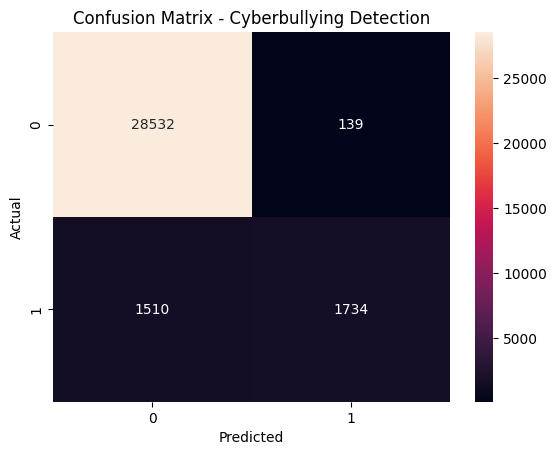

In [21]:
# Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cyberbullying Detection")
plt.show()


In [22]:
# Test on New Comment

new_comment = [
    "You are such an idiot and deserve to be fired"
]

new_vec = tfidf.transform(new_comment)
prediction = nb.predict(new_vec)[0]

if prediction == 1:
    print("Result: CYBERBULLYING DETECTED")
else:
    print("Result: NORMAL COMMENT")


Result: CYBERBULLYING DETECTED
